In [7]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sym
sym.init_printing(use_unicode=True)

In [9]:
print(np.finfo(np.float64))

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
smallest_normal = 2.2250738585072014e-308   smallest_subnormal = 4.9406564584124654e-324
---------------------------------------------------------------



In [10]:
a = 0.
b = 0.25*np.pi
f = lambda x: np.sin(x)

In [12]:
I = -np.cos(b) + np.cos(a)
I

In [37]:
n = 6
Roots, Weights = np.polynomial.legendre.leggauss(n)
Roots,Weights

(array([-0.93246951, -0.66120939, -0.23861919,  0.23861919,  0.66120939,
         0.93246951]),
 array([0.17132449, 0.36076157, 0.46791393, 0.46791393, 0.36076157,
        0.17132449]))

In [38]:
t = 0.5*( (b-a)*Roots + a + b )
Integral = 0.5*(b-a)*np.sum(Weights*f(t))
Integral

In [39]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

In [40]:
def GetLegendre(n,x,y):
    
    y = (x**2 - 1)**n
    
    poly = sym.diff( y,x,n )/(2**n*np.math.factorial(n))
    
    return poly

In [41]:
Legendre = []
DLegendre = []

for i in range(n+1):
    Poly = GetLegendre(i,x,y)
    Legendre.append(Poly)
    DLegendre.append(sym.diff(Poly,x,1))

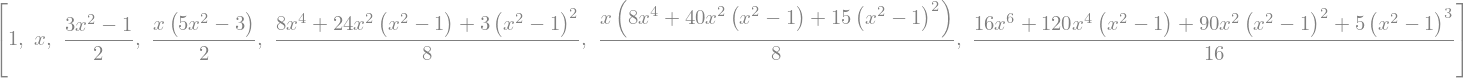

In [42]:
Legendre

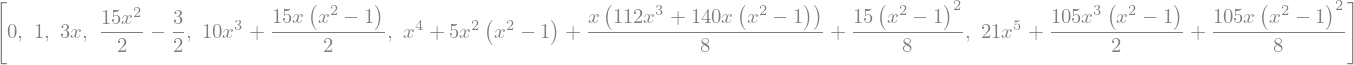

In [43]:
DLegendre

In [44]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

In [45]:
def GetRoots(f,df,x,tolerancia = 14):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)
        
        if root != False:
            
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

In [46]:
def GetAllRoots(n,xn,Legendre,DLegendre):
    
    poly = sym.lambdify([x],Legendre[n],'numpy')
    Dpoly = sym.lambdify([x],DLegendre[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)
    
    return Roots

In [47]:
xn = np.linspace(-1,1,100)
Roots1 = GetAllRoots(n,xn,Legendre,DLegendre)

In [48]:
Roots1

array([-0.93246951, -0.66120939, -0.23861919,  0.23861919,  0.66120939,
        0.93246951])

In [49]:
Roots

array([-0.93246951, -0.66120939, -0.23861919,  0.23861919,  0.66120939,
        0.93246951])

In [5]:
f = lambda x: np.sin(x)
a = 0.
b = 0.25*np.pi

In [6]:
# Integral usando scipy
integrate.quad(f,a,b)